#### Logistic Regression - Model

In [319]:
#Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [320]:
#Loading the transformed and standardized Data
data = pd.read_csv(r"C:\HOME\SJSU\Solar_Data\solar_data_transformed18.csv")

In [321]:
#Selecting the features and defining the target features
X = data.drop(columns=['InstallType', 'ID'])
y = data['InstallType']

In [322]:
#Splitting the data into Train and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [323]:
#Training the Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [324]:
#Predictions
y_pred = logistic_model.predict(X_test)

In [325]:
#evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8024691358024691

Confusion Matrix for Logistic Regression:
[[543  27  77]
 [ 27 325  64]
 [ 61  64 432]]


In [326]:
from sklearn.metrics import classification_report

class_mapping = {
    0: "Ground",
    1: "Parking",
    2: "Rooftop"
}

target_names = [class_mapping[label] for label in sorted(class_mapping.keys())]

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:

              precision    recall  f1-score   support

      Ground       0.86      0.84      0.85       647
     Parking       0.78      0.78      0.78       416
     Rooftop       0.75      0.78      0.76       557

    accuracy                           0.80      1620
   macro avg       0.80      0.80      0.80      1620
weighted avg       0.80      0.80      0.80      1620



#### Hyperparameter Tuning for Logistic Regression

In [327]:
#Defining the hyperparameter grid for Logistic Regression
param_grid = {
    'solver': ['liblinear', 'saga'], 
    'penalty': ['l1', 'l2'],  
    'C': [0.01, 0.1, 1, 10, 100],  #Regularization
    'class_weight': [None, 'balanced'] 
}

#Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    #5-fold cross-validation
    cv=5,  
    verbose=1,
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [328]:
#Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
#print("\nBest Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [329]:
#predictions
logistic_model = grid_search.best_estimator_
y_pred = logistic_model.predict(X_test)

#### Model Evaluation: Logistic Regression

In [330]:
#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8074074074074075


In [331]:
#precision
from sklearn.metrics import precision_score
print("\nPrecision (Macro):", precision_score(y_test, y_pred, average='macro'))


Precision (Macro): 0.8024217772912531


In [332]:
#Classification Report
from sklearn.metrics import classification_report


class_mapping = {
    0: "Ground",
    1: "Parking",
    2: "Rooftop"
}

target_names = [class_mapping[label] for label in sorted(class_mapping.keys())]

print("\nClassification Report after Hyperparameter Tuning:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report after Hyperparameter Tuning:

              precision    recall  f1-score   support

      Ground       0.87      0.83      0.85       647
     Parking       0.77      0.83      0.80       416
     Rooftop       0.77      0.76      0.77       557

    accuracy                           0.81      1620
   macro avg       0.80      0.81      0.80      1620
weighted avg       0.81      0.81      0.81      1620



In [333]:
from sklearn.metrics import recall_score
print("\nRecall (Macro):", recall_score(y_test, y_pred, average='macro'))


Recall (Macro): 0.8078744943624522


In [334]:
from sklearn.metrics import f1_score
print("\nF1-Score (Macro):", f1_score(y_test, y_pred, average='macro'))


F1-Score (Macro): 0.8046425244630365


In [335]:
from sklearn.metrics import matthews_corrcoef
print("\nMatthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))


Matthews Correlation Coefficient: 0.7080813568574619


In [336]:
from sklearn.metrics import jaccard_score
print("\nJaccard Score (Macro):", jaccard_score(y_test, y_pred, average='macro'))


Jaccard Score (Macro): 0.6744738143077572


In [337]:
from sklearn.metrics import log_loss

#probabilities for all classes
y_prob = logistic_model.predict_proba(X_test)

#Passing the true labels explicitly
unique_classes = logistic_model.classes_
print("Log Loss:", log_loss(y_test, y_prob, labels=unique_classes))

#y_prob = logistic_model.predict_proba(X_test)[:, 1]

Log Loss: 0.5569471013650239


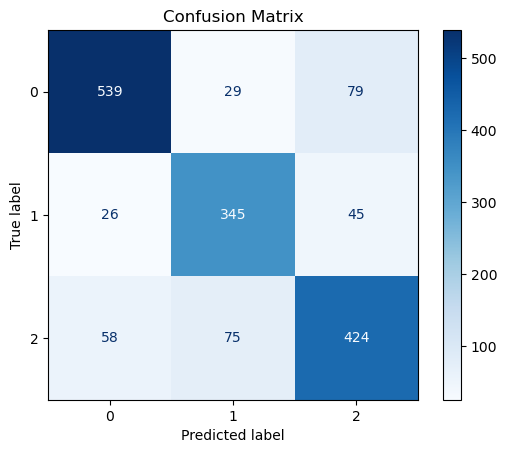

In [338]:
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion matrix plot
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

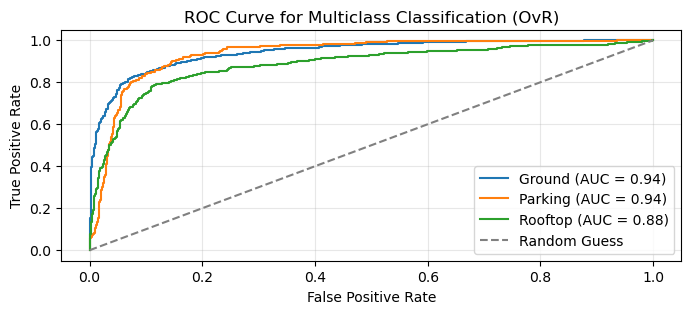

In [339]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

#Define a mapping for class names
class_mapping = {
    0: "Ground",
    1: "Parking",
    2: "Rooftop"
}

#Ensuring classes are correctly labeled and binarized
n_classes = len(logistic_model.classes_)
y_test_bin = label_binarize(y_test, classes=logistic_model.classes_)

#Ensuring probabilities are available for all classes
y_prob = logistic_model.predict_proba(X_test)

#Plotting the ROC Curve for each class
plt.figure(figsize=(8, 3))
for i, class_label in enumerate(logistic_model.classes_):
    #Compute FPR and TPR
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i]) 
    roc_auc = auc(fpr, tpr)
    #Use custom class name in the legend
    class_name = class_mapping[class_label]
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

#Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

#Customize the plot
plt.title("ROC Curve for Multiclass Classification (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


Ground and Parking classes maintain high separability (AUC = 0.94), meaning the model performs well in distinguishing these classes from others.
Rooftop class has a lower AUC (0.88), indicating challenges in separating it from other classes.

In [340]:
from sklearn.metrics import roc_auc_score

#Getting the probabilities for all classes
y_prob = logistic_model.predict_proba(X_test)  

#Use roc_auc_score with 'ovr' or 'ovo' for multiclass
print("ROC-AUC Score (OVR):", roc_auc_score(y_test, y_prob, multi_class='ovr'))
print("ROC-AUC Score (OVO):", roc_auc_score(y_test, y_prob, multi_class='ovo'))

ROC-AUC Score (OVR): 0.9204487624789248
ROC-AUC Score (OVO): 0.918812942549585


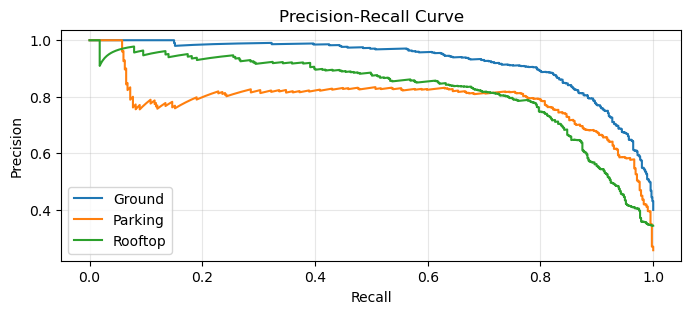

In [341]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

#Define a mapping for class names
class_mapping = {
    0: "Ground",
    1: "Parking",
    2: "Rooftop"
}

#Binarize the true labels
n_classes = len(np.unique(y_test))  
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)) 

#Confirm the shape of y_prob
y_prob = logistic_model.predict_proba(X_test) 

#Plotting the Precision-Recall Curve for each class
plt.figure(figsize=(8, 3))
for i, class_label in enumerate(np.unique(y_test)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    class_name = class_mapping[class_label] 
    plt.plot(recall, precision, label=f"{class_name}")
    
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

1. Ground class has the highest precision across all recall levels, indicating that the model performs best in identifying this class with minimal false positives. 
2. Rooftop class shows moderate performance, with precision decreasing steadily as recall increases. 
3. Parking class has the steepest drop in precision, suggesting the model struggles to correctly classify this class, likely due to class overlap or imbalance.

In [342]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.2772


Key Insights:
1. Accuracy increased from 80.25% to 80.7%, showing the tuned model does marginally better.
2. Precision, recall, and F1-scores are consistently around 0.80–0.81 in both versions, showing that the classification performance is reliable and well-balanced.
3. This tuned model notably improved Parking recall from 0.78 to 0.83, reducing false negatives and improving class-level performance.
4. However, the model still has issues with the class Rooftop, which displays a much lower precision and recall compared with other classes.